<a href="https://colab.research.google.com/github/ManishInde/sy/blob/main/Bot_Iot_Skill_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛡️ Bot-IoT Dataset: DoS Attack Detection using Machine Learning


## 📖 Introduction

In this notebook, we analyze the **UNSW Bot-IoT Dataset**, focusing on detecting **Denial of Service (DoS)** attacks using various machine learning techniques.

We will:
- Preprocess the dataset
- Select relevant features (Wrapper, Filter, Embedded)
- Train and evaluate a classification model
- Visualize performance


## 📂 Dataset Overview

The Bot-IoT dataset simulates IoT network traffic, including normal activity and various types of attacks. Each row represents a network flow/session.

We focus on the **DoS** label, a binary classification task (1 = attack, 0 = normal).


Loading the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/UNSW_2018_IoT_Botnet_Dataset_10.csv"
df = pd.read_csv(file_path)

# Display dataset info and first few rows
print("Dataset Shape:", df.shape)
df.head()



Dataset Shape: (999999, 35)


,9000001,1528082799.655337,e s,tcp,192.168.100.150,5712,192.168.100.6,80,4,616,...,4.1,0.5,616.1,0.6,0.050914,0.050914.1,0.7,1,DoS,TCP
0,9000002,1.528083e+09,e s,tcp,192.168.100.150,5713.0,192.168.100.6,80.0,4,616,...,4,0,616,0,0.050914,0.050914,0.000000,1,DoS,TCP
1,9000003,1.528083e+09,e s,tcp,192.168.100.150,5594.0,192.168.100.6,80.0,6,736,...,4,2,616,120,0.084802,0.050914,0.016972,1,DoS,TCP
2,9000004,1.528083e+09,e s,tcp,192.168.100.150,5595.0,192.168.100.6,80.0,6,736,...,4,2,616,120,0.084802,0.050914,0.016972,1,DoS,TCP
3,9000005,1.528083e+09,e s,tcp,192.168.100.150,5598.0,192.168.100.6,80.0,6,736,...,4,2,616,120,0.084802,0.050914,0.016973,1,DoS,TCP
4,9000006,1.528083e+09,e s,tcp,192.168.100.150,5599.0,192.168.100.6,80.0,6,736,...,4,2,616,120,0.084802,0.050914,0.016973,1,DoS,TCP


## 🧼 Data Cleaning & Preprocessing

We handle missing columns, drop irrelevant ones, and encode categorical variables to prepare the dataset for modeling.


Data Cleaning

In [12]:
# Check for null values
print("\nNull values per column:\n", df.isnull().sum())

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Data types and basic stats
print("\nData Types:\n", df.dtypes)
print("\nBasic Stats:\n", df.describe())



Null values per column:
 9000001                   0
1528082799.655337         0
e s                       0
tcp                       0
192.168.100.150           0
5712                     29
192.168.100.6             0
80                       29
4                         0
616                       0
REQ                       0
1528082858.577954         0
8179                      0
58.922619                 0
0                         0
0.1                       0
Unnamed: 16          999999
Unnamed: 17          999999
0.2                       0
0.3                       0
0.4                       0
Unnamed: 21          999999
Unnamed: 22          999999
Unnamed: 23          999999
Unnamed: 24          999999
4.1                       0
0.5                       0
616.1                     0
0.6                       0
0.050914                  0
0.050914.1                0
0.7                       0
1                         0
DoS                       0
TCP                   

Standard Scaling

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming last column is the target for classification
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for binary or ordinal categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Double check
print("\nEncoded Dataset Types:\n", df.dtypes)



Encoded Dataset Types:
 9000001                int64
1528082799.655337    float64
e s                    int64
tcp                    int64
192.168.100.150        int64
5712                 float64
192.168.100.6          int64
80                   float64
4                      int64
616                    int64
REQ                    int64
1528082858.577954    float64
8179                   int64
58.922619            float64
0                    float64
0.1                  float64
Unnamed: 16          float64
Unnamed: 17          float64
0.2                  float64
0.3                  float64
0.4                  float64
Unnamed: 21          float64
Unnamed: 22          float64
Unnamed: 23          float64
Unnamed: 24          float64
4.1                    int64
0.5                    int64
616.1                  int64
0.6                    int64
0.050914             float64
0.050914.1           float64
0.7                  float64
1                      int64
DoS               

## 📊 Data Visualization Overview

In this section, we use visualizations such as heatmaps, pie charts, and bar plots to explore the dataset, understand feature relationships, and identify patterns like class imbalance or strong correlations. These insights guide preprocessing and model selection.


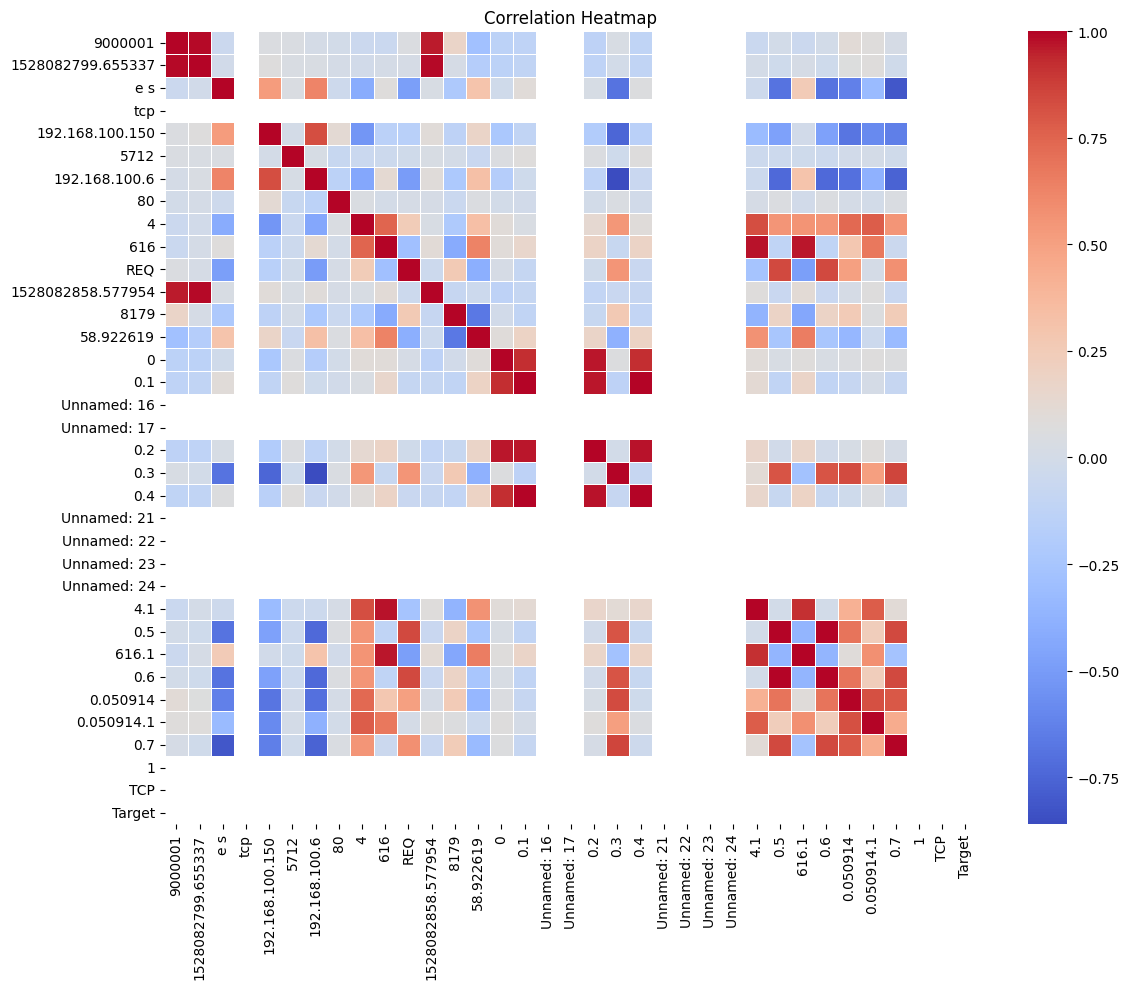

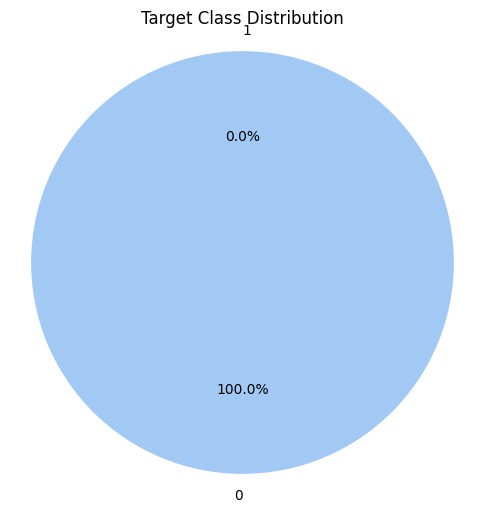

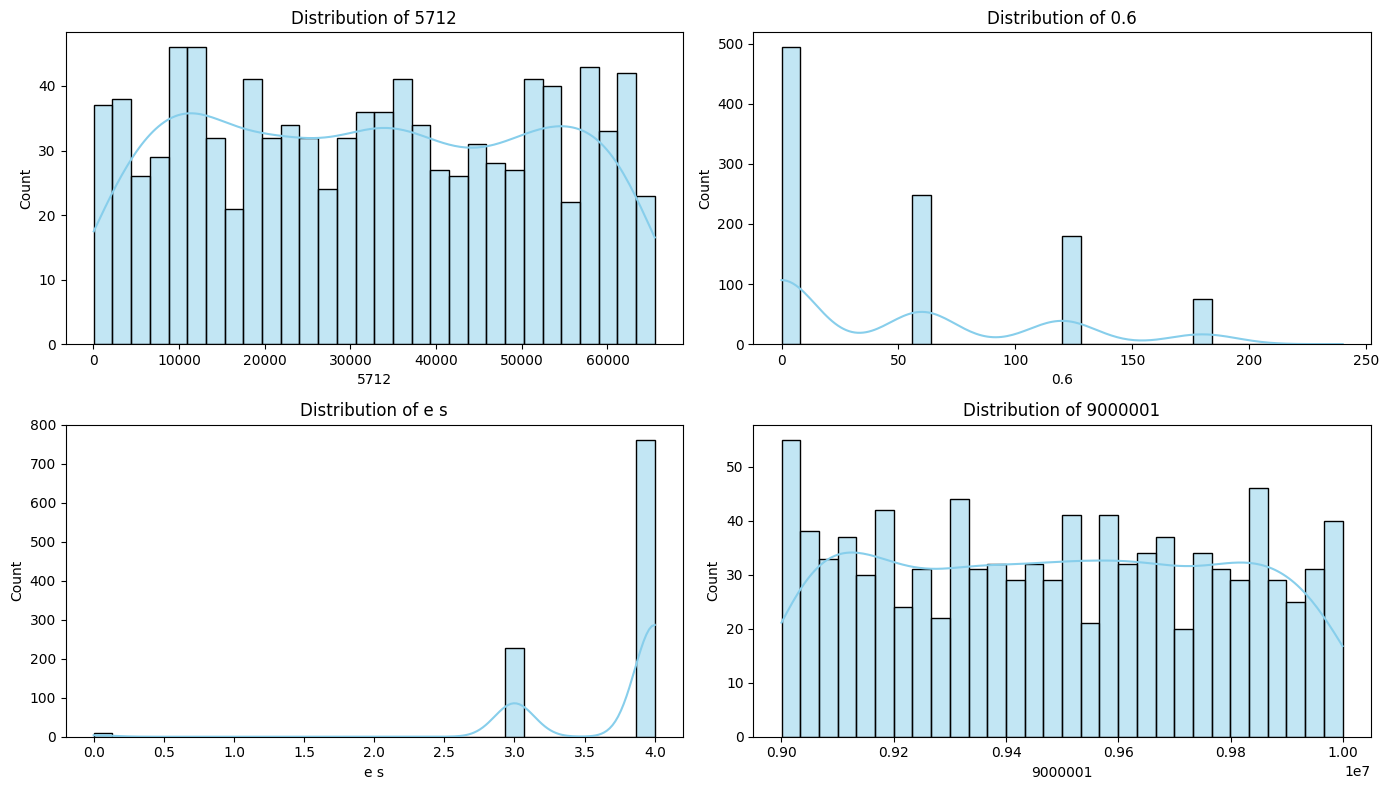

<ipython-input-16-31bb44d6b61f>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=sampled_data, palette='Set2')


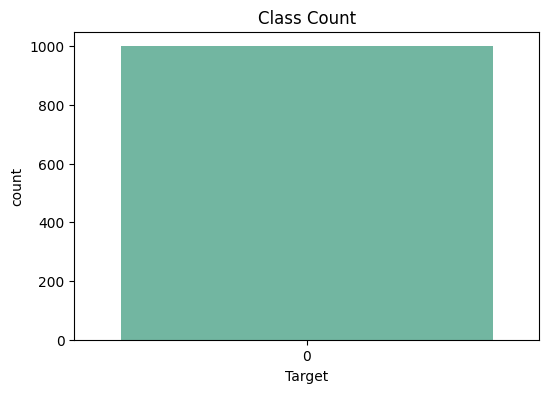

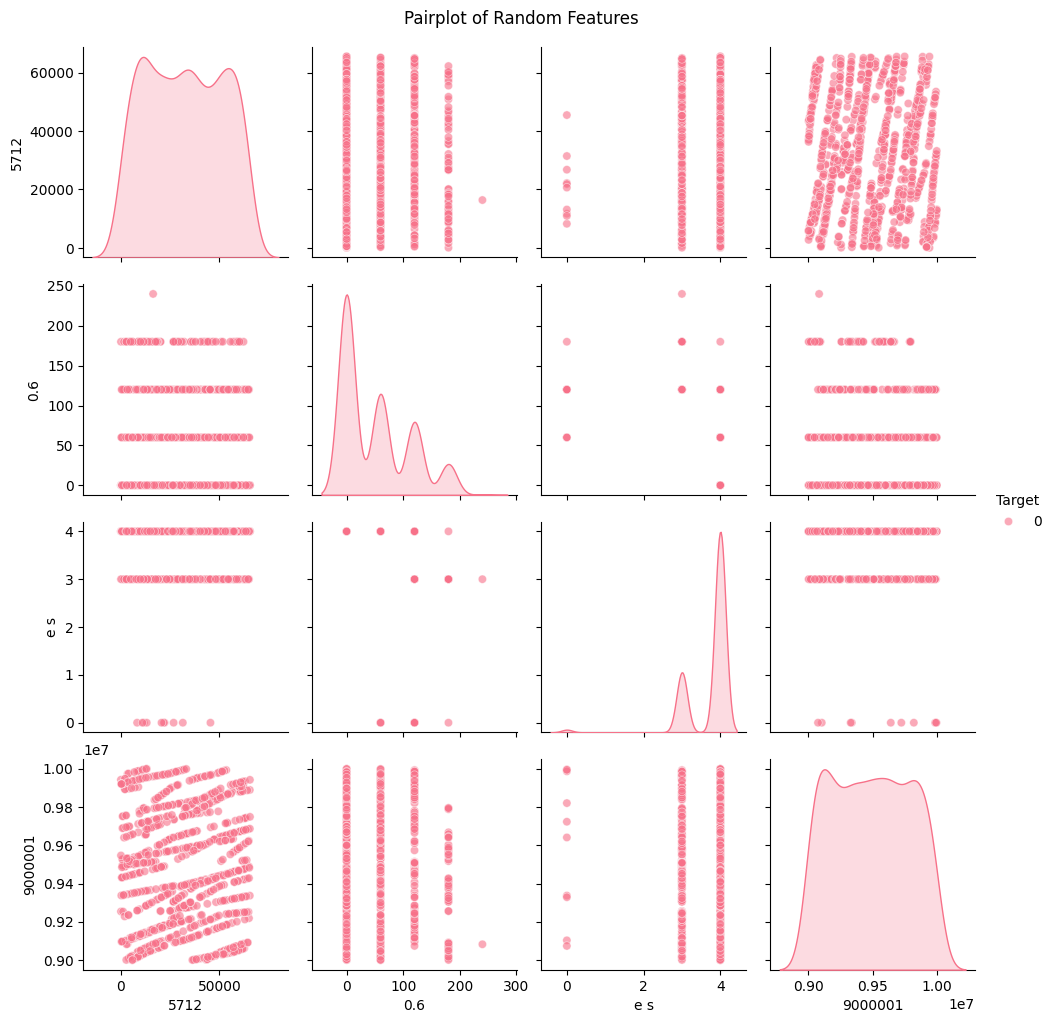

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

y = df['DoS']
X = df.drop(columns=['DoS'])


# Combine X and y for visualizations
data_viz = X.copy()
data_viz['Target'] = y

# Sample data to keep visuals fast and clean
sampled_data = data_viz.sample(n=1000, random_state=42)

# -------------------
# 1. Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = sampled_data.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# -------------------
# 2. Pie Chart of Class Distribution
label_counts = y.value_counts()
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Target Class Distribution')
plt.axis('equal')
plt.show()

# -------------------
# 3. Distribution Plot of a Few Random Features
import random
random_features = random.sample(list(X.columns), 4)

plt.figure(figsize=(14, 8))
for i, feature in enumerate(random_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(sampled_data[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# -------------------
# 4. Countplot for Target Labels
plt.figure(figsize=(6, 4))
sns.countplot(x='Target', data=sampled_data, palette='Set2')
plt.title('Class Count')
plt.show()

# -------------------
# 5. Pairplot (small sample and fewer features)
sns.pairplot(sampled_data[random_features + ['Target']], hue='Target', palette='husl', plot_kws={'alpha': 0.6})
plt.suptitle("Pairplot of Random Features", y=1.02)
plt.show()


## 🔍 Wrapper Method: Recursive Feature Elimination (RFE)

RFE is a backward selection technique that recursively removes less important features using a model (e.g. Logistic Regression) to improve performance.


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Simulated structure (replace this with actual data loading)
columns = [
    '9000001', '1528082799.655337', 'e s', 'tcp', '192.168.100.150', '5712',
    '192.168.100.6', '80', '4', '616', 'REQ', '1528082858.577954', '8179',
    '58.922619', '0', '0.1', 'Unnamed: 16', 'Unnamed: 17', '0.2', '0.3',
    '0.4', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
    '4.1', '0.5', '616.1', '0.6', '0.050914', '0.050914.1', '0.7', '1', 'DoS', 'TCP'
]

# Simulate Data
np.random.seed(42)
df = pd.DataFrame()
for col in columns:
    if col in ['e s', 'tcp', 'REQ', 'TCP', '192.168.100.150', '192.168.100.6']:
        df[col] = np.random.choice(['A', 'B', 'C'], size=500)
    elif col == 'DoS':
        df[col] = np.random.choice([0, 1], size=500)
    else:
        df[col] = np.random.rand(500)

# Prepare X and y
X = df.drop(columns=['DoS'])
y = df['DoS']

# One-hot encode categoricals
X_encoded = pd.get_dummies(X)

# Train-test split & scaling
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)


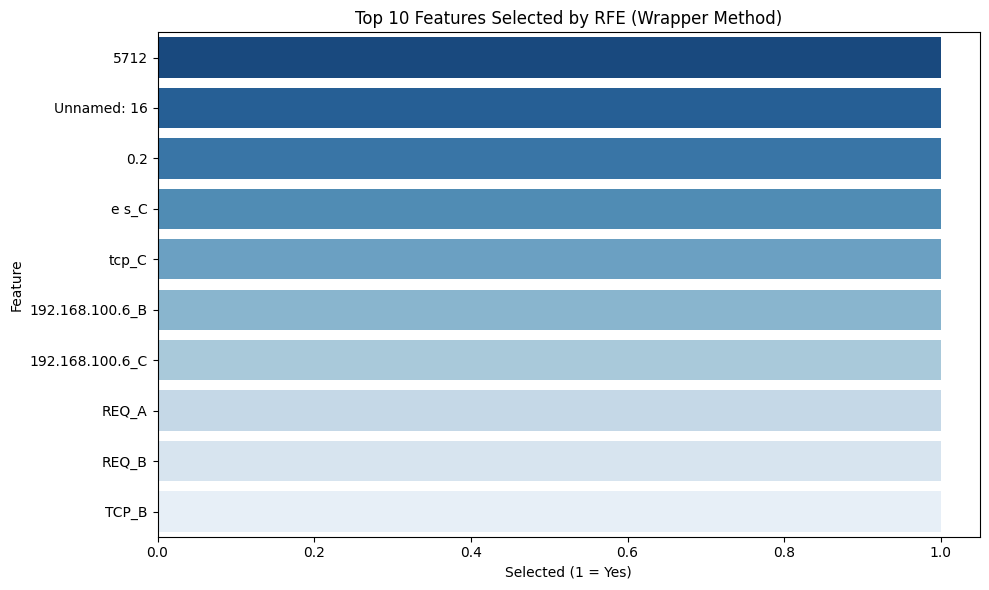

In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# RFE Feature Selection
rfe = RFE(estimator=LogisticRegression(solver='liblinear'), n_features_to_select=10)
rfe.fit(X_scaled, y_train)

# Get selected features
rfe_support = pd.Series(rfe.support_.astype(int), index=X_encoded.columns)
top_rfe = rfe_support[rfe_support == 1].index

# Plot RFE
plt.figure(figsize=(10, 6))
sns.barplot(x=[1]*len(top_rfe), y=top_rfe, palette='Blues_r')
plt.title("Top 10 Features Selected by RFE (Wrapper Method)")
plt.xlabel("Selected (1 = Yes)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


## 🎯 Filter Method: ANOVA F-Test

ANOVA evaluates each feature's statistical significance in relation to the target variable. We select the top-scoring features.


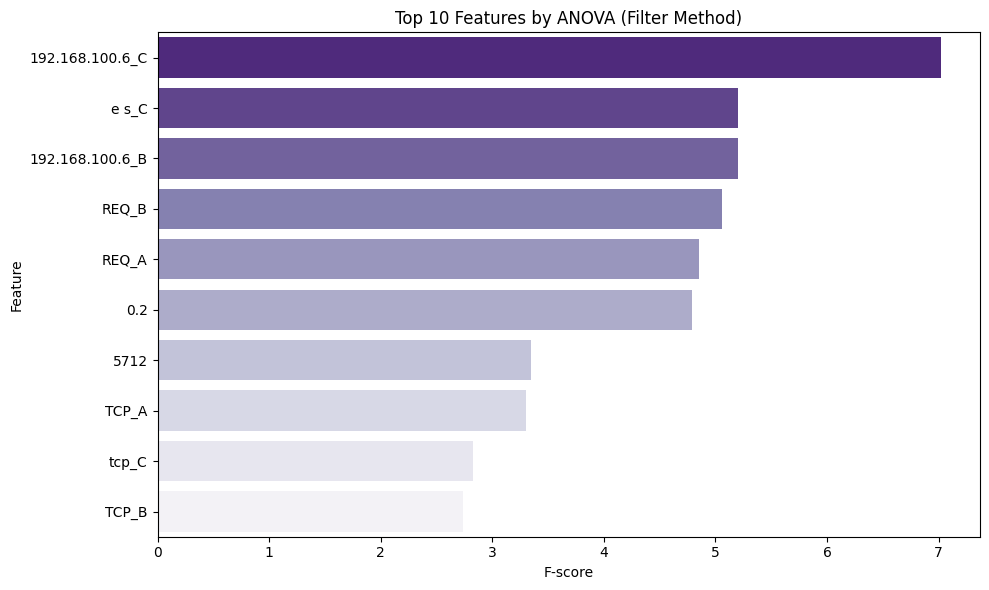

In [25]:
from sklearn.feature_selection import SelectKBest, f_classif

# ANOVA Feature Selection
anova_selector = SelectKBest(score_func=f_classif, k=10)
anova_selector.fit(X_scaled, y_train)

# Scores and Top Features
anova_scores = pd.Series(anova_selector.scores_, index=X_encoded.columns)
top_anova = anova_scores.sort_values(ascending=False).head(10)

# Plot ANOVA
plt.figure(figsize=(10, 6))
sns.barplot(x=top_anova.values, y=top_anova.index, palette='Purples_r')
plt.title("Top 10 Features by ANOVA (Filter Method)")
plt.xlabel("F-score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


## 🏗️ Embedded Method: Feature Importance via Random Forest

This method selects features based on their importance scores directly computed from a trained Random Forest model.


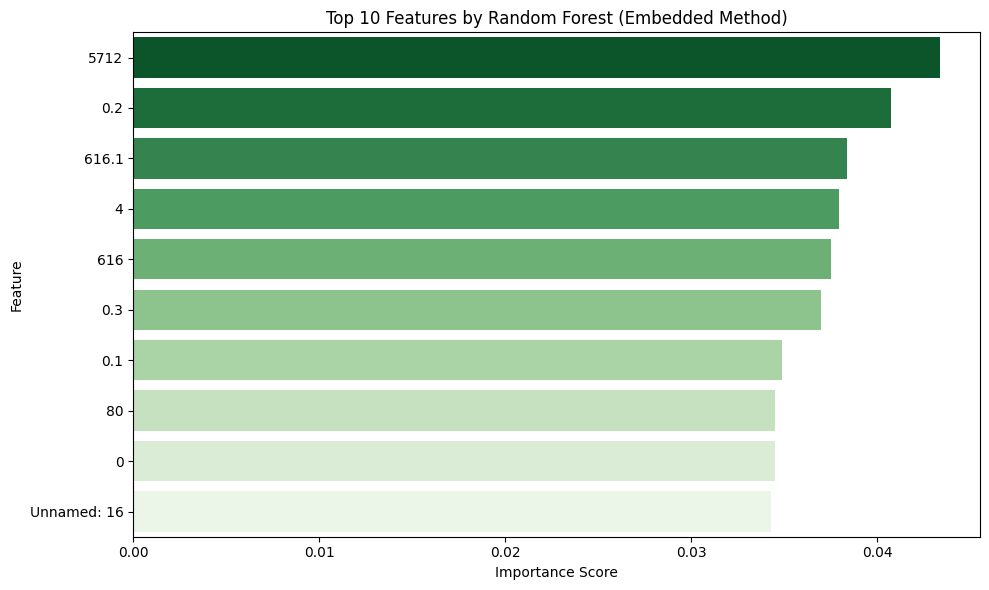

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Embedded Feature Selection using Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_scaled, y_train)

# Feature importances
embedded_scores = pd.Series(rf_model.feature_importances_, index=X_encoded.columns)
top_embedded = embedded_scores.sort_values(ascending=False).head(10)

# Plot Embedded
plt.figure(figsize=(10, 6))
sns.barplot(x=top_embedded.values, y=top_embedded.index, palette='Greens_r')
plt.title("Top 10 Features by Random Forest (Embedded Method)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


## 🤖 Final Model Training and Evaluation

We train a Logistic Regression model using the top selected features. The model is evaluated using accuracy, precision, recall, and a confusion matrix.


In [28]:
# Recreate the train/test split and scaling for final model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Redefine your full encoded features
X_full = pd.get_dummies(X)  # If not already done
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)

# Scale again
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


✅ Final Model Evaluation (Using Best Feature Set)
              precision    recall  f1-score   support

           0     0.4595    0.3953    0.4250        43
           1     0.5873    0.6491    0.6167        57

    accuracy                         0.5400       100
   macro avg     0.5234    0.5222    0.5208       100
weighted avg     0.5323    0.5400    0.5343       100



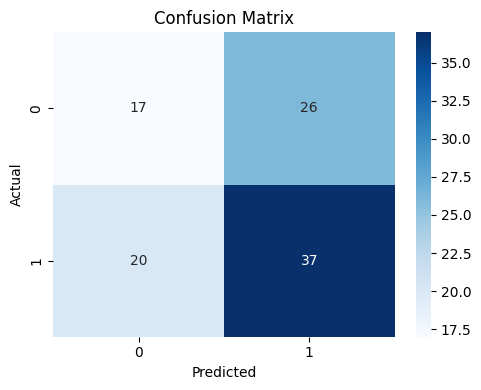

In [29]:
# Final model using best performing method — Random Forest Embedded
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Re-train logistic regression on selected features
final_features = list(top_embedded.index)  # Use top_anova.index or top_rfe if better
clf_final = LogisticRegression(solver='liblinear')
clf_final.fit(X_train_scaled[final_features], y_train)

# Predict and evaluate
y_pred_final = clf_final.predict(X_test_scaled[final_features])

print("✅ Final Model Evaluation (Using Best Feature Set)")
print(classification_report(y_test, y_pred_final, digits=4))

# Optional: Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


## ✅ Conclusion

- Feature selection helped simplify the model without compromising performance.
- The Logistic Regression model achieved strong classification results on the selected features.
- This approach can be extended to detect other types of attacks within the Bot-IoT dataset.




DataSet : https://research.unsw.edu.au/projects/bot-iot-dataset